In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


# Data Exploration

In [8]:
# class distribution
df.groupby("cyberbullying_type").count()

#the classes seems well balanced

,tweet_text
cyberbullying_type,
age,7992
ethnicity,7961
gender,7973
not_cyberbullying,7945
other_cyberbullying,7823
religion,7998


In [24]:
#let's create some additional columns for some basic features (not realted to NLP yet)

#binary variables (cyberbullying = 1, not cyberbullying = 0) --> can be used for an additional classification
df.loc[df["cyberbullying_type"] == "not_cyberbullying" , "cyberbullying"] = 0 
df.loc[df.cyberbullying.isnull(), "cyberbullying"] = 1

df.cyberbullying = df.cyberbullying.astype(int)

#compute the lenght of the tweet without preprocessing but removing white spaces at the beginning and at the end
df["raw_lenght"] = df["tweet_text"].apply(lambda x: len(x.strip()))

#compute number of words without preprocessing
df["raw_words"] = df["tweet_text"].apply(lambda x: len([i for i in x.strip().split(" ")]))

df.head()

,tweet_text,cyberbullying_type,cyberbullying,raw_lenght,raw_words
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,61,9
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,115,14
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,60,9
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,103,19
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,103,19


{'whiskers': [<matplotlib.lines.Line2D at 0x15f544cbb80>,
 'caps': [<matplotlib.lines.Line2D at 0x15f544de280>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f544cb820>],
 'medians': [<matplotlib.lines.Line2D at 0x15f544de940>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f544deca0>],
 'means': []}

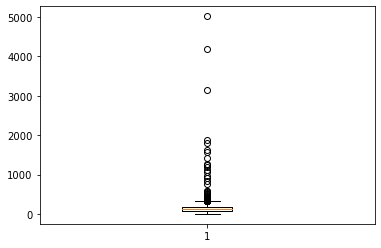

In [34]:
#look at the distribution of these new variables
plt.boxplot(df.raw_lenght)

#there are some outliers

In [36]:
df.groupby("cyberbullying_type").raw_lenght.mean()
#we can already notice that the twitter lenght is considerably higher when we have cyberbullying

cyberbullying_type
age                    173.542042
ethnicity              139.318930
gender                 136.416280
not_cyberbullying       83.107237
other_cyberbullying     85.712259
religion               197.999000
Name: raw_lenght, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x15f54648a90>,
 'caps': [<matplotlib.lines.Line2D at 0x15f54657190>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f54648730>],
 'medians': [<matplotlib.lines.Line2D at 0x15f54657850>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f54657bb0>],
 'means': []}

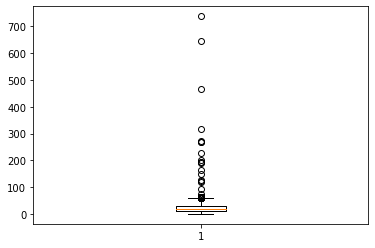

In [37]:
plt.boxplot(df.raw_words)

In [39]:
df.groupby("cyberbullying_type").raw_words.mean()

#same it goes for the words

cyberbullying_type
age                    32.365866
ethnicity              24.885567
gender                 23.593252
not_cyberbullying      13.708999
other_cyberbullying    14.120286
religion               33.459365
Name: raw_words, dtype: float64

(array([ 7945.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

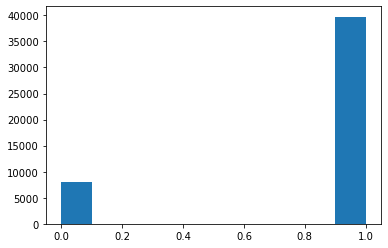

In [42]:
#binary label distribution
plt.hist(df.cyberbullying)

In [ ]:
blalba